# **Gender in Hollywood:**<br> An Exploration of Gender Differences <br> as Seen Through the IMDB Database

## Our story

For this project, we decided to peruse the IMDB database to determine how gender equality fares in the film world. For this purpose, we began by seeing the division in number of actors, which we found out was predominantly male with 2/3 actors being men and 1/3 women. This trend did not change over the years. We then discovered that, in spite of the lower number of women, these women also tend to have fewer roles, with 1 less role on average than their male counterparts. We also saw that men dominated almost every movie genre, with the notable exception of adult films, in which female actresses dominated, hinting towards the film industry's taste for comodificating the female body. Male actors who participated in adult films, however, tended to have more roles on average than female actresses, but female actresses in general were more likely to join the adult industry. We then moved on to the directors, the genders of which we discovered through the use of a gender guesser. Similarly, there were significantly more male directors than female, a trend that did not change throughout the years. On average, these male directors tended to create almost 2 more movies than their female counterparts. Lastly, we checked whether having a male dominated, female dominated, or equally distributed movie changed the ratings of the movies, and we saw that generally male dominated movies did better. Thus, by gathering all of this data we concluded that women are still heavily underrepresented in the film industry, although because our database only goes until 2008, we do hope this trend may have changed these past few years.

## Connection cells
These cells allow us to connect to the MySQL server

In [1]:
# Leander's connection

import pandas as pd
import sqlalchemy
from sqlalchemy import text, create_engine
from sqlalchemy.types import VARCHAR, INT
import seaborn as sns
import gender_guesser.detector
import re
import matplotlib.pyplot as plt

user='root'
host = "localhost"
port = 3306
password="Password"
dbname="imdb"
engine = sqlalchemy.create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{dbname}')
conn = engine.connect()
print(conn)

In [2]:
# Area's connection

import pandas as pd
import re
import sqlalchemy
from sqlalchemy import text, create_engine
from sqlalchemy.types import VARCHAR, INT
import gender_guesser.detector
import seaborn as sns

user='root'
host = "localhost"
port = 3306
password="###"
dbname="imdb"
engine = sqlalchemy.create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{dbname}')
conn = engine.connect()
print(conn)

C:\Users\area-\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Our queries
Underneath we have the queries we will use for the story.

In [48]:
# This query checks the total number of actors present in the database, how many are male, how many are female, and the 
# percentage of each.
query = '''SELECT
COUNT(*) AS total_actors,
SUM(CASE WHEN gender = 'M' THEN 1 ELSE 0 END) AS male_actors,
SUM(CASE WHEN gender = 'F' THEN 1 ELSE 0 END) AS female_actors,
((SUM(CASE WHEN gender = 'M' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS m_percentage,
((SUM(CASE WHEN gender = 'F' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS f_percentage
FROM
actors;
'''
pd.read_sql(query,conn)

,total_actors,male_actors,female_actors,m_percentage,f_percentage
0,817718,513306.0,304412.0,62.773,37.227


From this query, we can already see there is a discrepancy in the distribution of actors, as 62% are male and 37% are female, which may point to a lack of equal opportunities for women to become actors.

In [54]:
# This query creates a view with the id and gender of each actor, what movies they have been in, and 
# what genre that movie belongs to.
query = '''CREATE VIEW actors_genre AS
SELECT actors.id AS actor_id, actors.gender AS actor_gender, roles.movie_id AS movie_id, movies_genres.genre AS movie_genre
FROM roles 
JOIN actors
ON roles.actor_id = actors.id
JOIN movies_genres
ON roles.movie_id = movies_genres.movie_id;'''
conn.execute(text(query))
conn.commit

<bound method Connection.commit of <sqlalchemy.engine.base.Connection object at 0x000002245AE0D850>>

This query does not produce an output per se, but rather creates a view that simplifies future queries, as creates the opportunity to group the actors by gender and genre.

In [55]:
#This query uses the previous established view, actors_genre, and checks the distribution of M/F actors per movie.
query = '''SELECT movie_id,
((SUM(CASE WHEN actor_gender = 'M' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS m_percentage, 
((SUM(CASE WHEN actor_gender = 'F' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS f_percentage
FROM actors_genre
GROUP BY movie_id;
'''
pd.read_sql(query,conn)

,movie_id,m_percentage,f_percentage
0,2,75.0000,25.0000
1,5,100.0000,0.0000
2,6,90.6250,9.3750
3,9,25.0000,75.0000
4,11,68.0000,32.0000
...,...,...,...
197347,378610,87.5000,12.5000
197348,378611,54.5455,45.4545
197349,378612,57.1429,42.8571
197350,378613,66.6667,33.3333


The results from this query points towards a similar trend as the first query: an overrepresentation of men in film and underrepresentation of women. <br> Quite a few movies contain more men than women.

In [57]:
# This query uses the previous view, actors_genre, and calculates the percentage of M/F per genre.
query = '''SELECT movie_genre,
((SUM(CASE WHEN actor_gender = 'M' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS m_percentage, 
((SUM(CASE WHEN actor_gender = 'F' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS f_percentage
FROM actors_genre
GROUP BY movie_genre;
'''
pd.read_sql(query,conn)

,movie_genre,m_percentage,f_percentage
0,Crime,72.7377,27.2623
1,Comedy,66.5172,33.4828
2,Western,83.4687,16.5313
3,Family,66.6808,33.3192
4,Drama,67.5762,32.4238
5,Short,66.9004,33.0996
6,Romance,63.6884,36.3116
7,Mystery,70.0851,29.9149
8,Thriller,70.0916,29.9084
9,Adult,33.2829,66.7171


From this query we can learn that men do in fact dominate nearly every field, save for one notorious exception: adult films. That women dominate in this field points towards their objectification in film: instead of having equal opportunity in every genre, filmmakers only prominently choose them for the adult industry, thus only allowing women in front of a camera for the pleasure of the audience.

In [58]:
# This query checks the total number of Adult roles for female actors and male actors and divides it 
# by their total number of roles using the actors_genre view.
query = '''SELECT
((SUM(CASE WHEN actor_gender = 'F' AND movie_genre = 'Adult' THEN 1 ELSE 0 END)) / (SUM(CASE WHEN actor_gender = 'F' THEN 1 ELSE 0 END))) * 100 AS f_adult_percentage,
((SUM(CASE WHEN actor_gender = 'M' AND movie_genre = 'Adult' THEN 1 ELSE 0 END)) / (SUM(CASE WHEN actor_gender = 'M' THEN 1 ELSE 0 END))) * 100 AS m_adult_percentage,
((SUM(CASE WHEN movie_genre = 'Adult' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS total_adult_percentage
FROM actors_genre;'''
pd.read_sql(query, conn)

,f_adult_percentage,m_adult_percentage,total_adult_percentage
0,1.5299,0.3437,0.712


In [45]:
# creates a function A(ctor)G(ender)T(ime)difference, which takes 2 years and 1 gender parameter
# which then calculates the difference of amount of actors between those 2 years and for the specified gender

query = """CREATE FUNCTION AGT_difference(date1 INT, date2 INT, gender CHAR(1))
RETURNS INT
DETERMINISTIC
BEGIN
  DECLARE actors INT DEFAULT 0;
  SET actors = (
    SELECT COUNT(DISTINCT actor_id) FROM movies
    JOIN roles ON movies.id = roles.movie_id
    JOIN actors ON actors.id = roles.actor_id
    WHERE movies.year = date1 AND UPPER(gender)=actors.gender
  ) - (
    SELECT COUNT(DISTINCT actor_id) FROM movies
    JOIN roles ON movies.id = roles.movie_id
    JOIN actors ON actors.id = roles.actor_id
    WHERE movies.year = date2 AND UPPER(gender)=actors.gender
  );
  RETURN ABS(actors);
END;"""
conn.execute(text(query))
conn.commit()

In [47]:
# Here we can easily test the previous function
query = """SELECT actorgender_difference(1920, 1940, 'F') AS "Difference of actors";"""

pd.read_sql(query, conn)

,actor_diff
0,1519


The AGT function allows to see if between a set period of time, if there were more male or female actors that were added to the dataset. From this it is possible to derive if more male actors had their breakthrough or more female actors.

C:\Users\lean\AppData\Local\Temp\ipykernel_13584\1946734898.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=order, rotation=90)


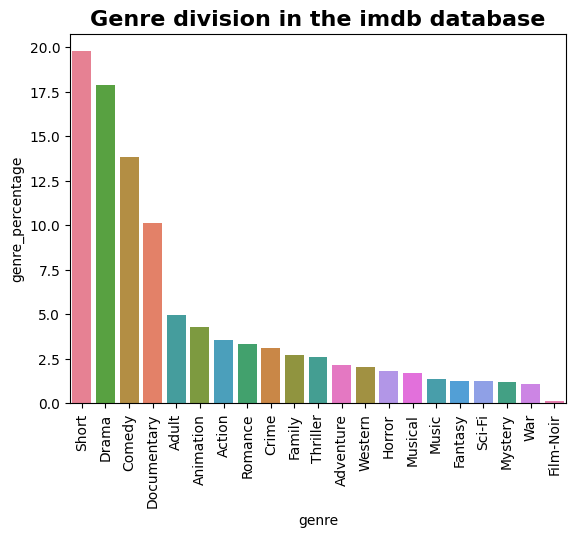

In [16]:
# These queries check the number of movie genres and the percentage for each one.
# Through Seaborn we also create a nice bar graph.
query = '''SELECT genre,
((COUNT(genre)) / (SELECT COUNT(*) FROM movies_genres)) * 100 AS genre_percentage
FROM movies_genres
GROUP BY genre;'''
adf_1=pd.read_sql(query, conn)
order = adf_1.sort_values('genre_percentage', ascending=False).genre
ax = sns.barplot(adf_1, x="genre", y='genre_percentage', hue='genre', order=order)
ax.set_xticklabels(labels=order, rotation=90)
ax.set_title('Genre division in the imdb database', fontsize=16, color='black', fontweight='bold')
plt.show()

The generated graph shows the amount of movies per genre in a percentual manner. From this we can see if a certain preference for male or female actors has more weigth if the genre is more or less represented. 

In [59]:
# This query checks the number of roles each actor has ever had and creates a view from it
query = '''CREATE VIEW num_of_roles AS
SELECT roles.actor_id AS actor_id, actors.gender AS actor_gender,
COUNT(roles.role) AS roles_per_actor
FROM roles
LEFT JOIN actors ON roles.actor_id = actors.id
GROUP BY actor_id;
'''
conn.execute(text(query))
conn.commit()

We can use the view to calculate if certain actors have more roles or less. It can be used to see if there is a preference per director if they are in subsequent movies or if combined with genres if a certain is more repeated in the same genre or if that has no effect on their future roles.

Text(0.5, 1.0, 'Average number of roles')

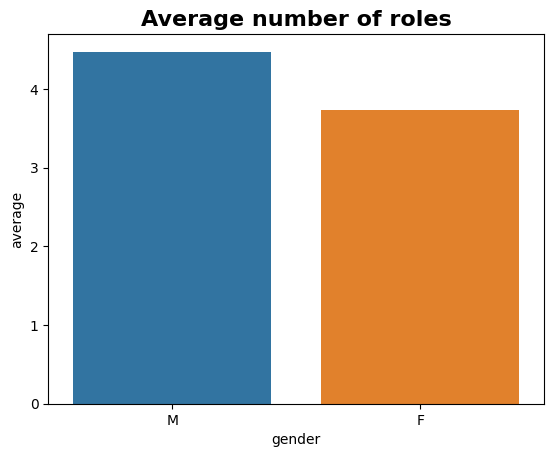

In [2]:
# This query uses the previously established view, num_of_roles, and averages how many roles male actors and female actors 
# and loads the output into a dataframe which is then used to create a bar graph.
query = '''SELECT actor_gender AS gender,
AVG(roles_per_actor) as average
FROM num_of_roles
GROUP BY gender;
'''
df = pd.read_sql(query,conn)
ax = sns.barplot(df, x= 'gender', y='average', hue='gender')
ax.set_title('Average number of roles', fontsize='16', color='black', fontweight='bold')

The query took the gender and combined it with the number of roles view. From there we made it take the average per gender to see if male actors get more or less roles on average compared to female actors.

Text(0.5, 1.0, 'Average number of roles in category adult')

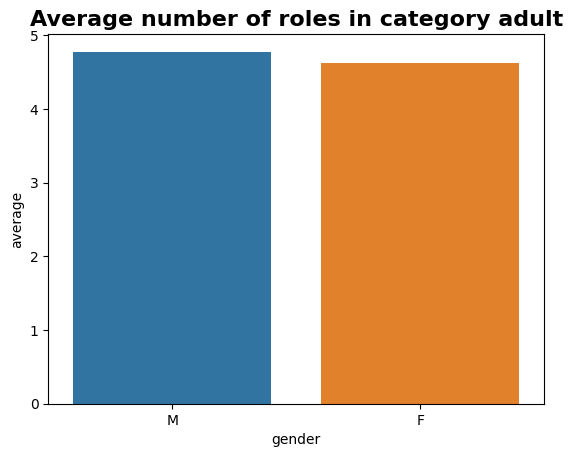

In [22]:
# Based on the previous query as a subquery, we add a filter focussing on adult movies
# to create a bar graph showing the average number of roles per gender.

query = '''SELECT AVG(movie_count) as average, actor_gender as gender
FROM (
    SELECT actor_id, actor_gender, COUNT(movie_id) as movie_count
    FROM actors_genre
    WHERE movie_genre = 'Adult'
    GROUP BY actor_id, actor_gender
) as subquery
GROUP BY gender
'''
df = pd.read_sql(query,conn)
ax = sns.barplot(df, x= 'gender', y='average', hue='gender')
ax.set_title('Average number of roles in category adult', fontsize='16', color='black', fontweight='bold')

Through this query we learn the average of roles per gender. The difference is not as striking as we expected it to be, although on average men tend to have 0.7 more roles than women. Given the discrepancy between the number of actresses and the number of roles, it could mean that once women break into the industry, they tend to be cast in roles more often.

### Guessing the gender

As the dataset did not include the gender for the directors, we used the gender detector tool to estimate the gender of each director. Of course this tool is not flawless and needed some amending. As we believe that mostly_male, mostly_femalen and androgynous was too inaccurate for our story telling, we decided to use Regular Expressions to force those labels into the unknown category.

In [26]:
# loading a new dataframe containing director id, and their full name.
directors_names_df = pd.read_sql('''SELECT id AS director_id, first_name, last_name FROM directors;''', conn)

In [28]:
# loading the gender detector tool and creating a function that goes over all first names and assigns a gender.

gender_detector= gender_guesser.detector.Detector()
def get_gender(name):
   
    initials_pattern = r"(?:[A-Z]\.){1,}"

    first = name
    first = re.sub(r'\W','',first) 
    first = first.title()

    if re.search(initials_pattern, first):
        gender = "unknown"
    else:
        gender = gender_detector.get_gender(first) # regex to only keep male and female, all other instances become unknown.
        if gender not in ["male", "female"]:
            gender = "unknown"

    return gender 

In [29]:
# using the created function on our dataframe.

gender = directors_names_df.first_name.apply(get_gender)
directors_names_df['gender'] = gender

directors_names_df

,director_id,first_name,last_name,gender
0,1114,A.,Aleksandrov,unknown
1,3728,A.,Babes,unknown
2,4175,A.,Balakrishnan,unknown
3,4871,A.,Barr-Smith,unknown
4,6779,A.,Berry,unknown
...,...,...,...,...
86875,45301,Zygmunt,Lech,male
86876,49536,Zygmunt,Malanowicz,male
86877,74165,Zygmunt,Skonieczny,male
86878,74841,Zygmunt,Solarz,male


In [30]:
# With this code we create a new table to keep the genders of the directors handy for future reference.
# We decided not to work with a view for this query as we wanted to see if we could also create a new table through Python in SQL.
# A little challenge for ourselves as you may call it.

table_name = 'directors_genders'
gender_types = {'first_name': VARCHAR(100), 'gender': VARCHAR(30)}

directors_names_df.to_sql(table_name, conn, index=False, if_exists='replace', dtype=gender_types, method='multi', chunksize=1000)
conn.commit()

test_df = pd.read_sql("""SELECT * FROM directors_genders""", conn)
test_df

,director_id,first_name,last_name,gender
0,1114,A.,Aleksandrov,unknown
1,3728,A.,Babes,unknown
2,4175,A.,Balakrishnan,unknown
3,4871,A.,Barr-Smith,unknown
4,6779,A.,Berry,unknown
...,...,...,...,...
86875,45301,Zygmunt,Lech,male
86876,49536,Zygmunt,Malanowicz,male
86877,74165,Zygmunt,Skonieczny,male
86878,74841,Zygmunt,Solarz,male


Through using the gender guessor, we created a new table containing director ID, first name, last name and the estimated gender. We will then use this table later in other queries.

In [3]:
# Creating an overview of the total amount of directors and the gender division 
# amongst the director population.

query_a5 = """SELECT
COUNT(*) AS total_directors,
SUM(CASE WHEN gender = 'male' THEN 1 ELSE 0 END) AS male_directors,
SUM(CASE WHEN gender = 'female' THEN 1 ELSE 0 END) AS female_directors,
SUM(CASE WHEN gender = 'unknown' THEN 1 ELSE 0 END) AS unknown_directors,
((SUM(CASE WHEN gender = 'male' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS m_percentage,
((SUM(CASE WHEN gender = 'female' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 AS f_percentage,
((SUM(CASE WHEN gender = 'unknown' THEN 1 ELSE 0 END)) / COUNT(*)) * 100 as u_percentage
FROM directors_genders
JOIN directors ON directors_genders.first_name = directors.first_name AND directors_genders.last_name = directors.last_name"""

pd.read_sql(query_a5, conn)

,total_directors,male_directors,female_directors,unknown_directors,m_percentage,f_percentage,u_percentage
0,87028,46491.0,9970.0,30567.0,53.4207,11.4561,35.1232


The query used the director_genders table and then true the SUM CASE functions calculated the total amount of male directors, female directors and the directors we could not guess the gender. For this we had to link the created table to the original directors table. From there we could see that male directors are 53% of our database, whilst female directors are only 11%. 35% of the directors have a gender we could not guess, so that can influence our results greatly.

<Axes: xlabel='year', ylabel='count'>

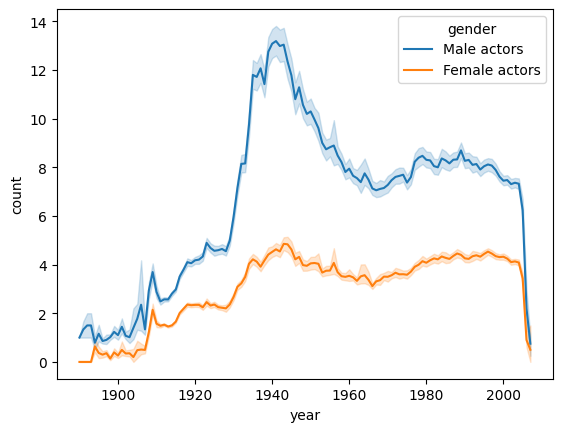

In [21]:
# creates a linegraph indicating the amount of male and female actors throughout the period of our dataset, which is normalized.

query_l1 = """SELECT name, COUNT(CASE WHEN actors.gender = 'M' THEN 1 END) AS 'Male actors',
COUNT(CASE WHEN actors.gender = 'F' THEN 1 END) AS 'Female actors', year
FROM movies
JOIN roles
ON roles.movie_id = movies.id
JOIN actors
ON roles.actor_id = actors.id
GROUP BY year, name, 'Count of actors'
"""
df = pd.read_sql(query_l1, conn)
df_melted = pd.melt(df, id_vars=['name', 'year'], value_vars=['Male actors', 'Female actors'], var_name='gender', value_name='count')
sns.lineplot(data=df_melted, x='year', y='count', hue='gender')

The query created a graph where we can see that throughout the period of our dataset there are a lot more male actors than female actors. Both genders have a growth which reaches its peak around 1940-1950 but especially male actors are peaking at that time.

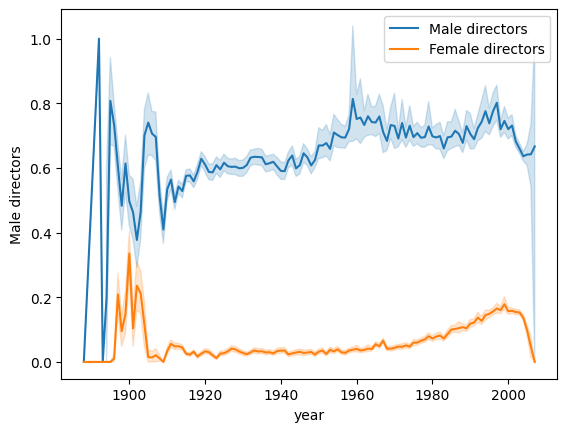

In [30]:
# Creates a normalized graph of the years a director publishes a movie, calculated for male and female directors.

query_l2="""SELECT name, COUNT(CASE WHEN gender = 'male' THEN 1 END) AS 'Male directors',
COUNT(CASE WHEN gender = 'female' THEN 1 END) AS 'Female directors', year
FROM directors_genders
JOIN movies_directors
ON movies_directors.director_id = directors_genders.director_id
JOIN movies
ON movies_directors.movie_id = movies.id
GROUP BY year, name
"""
df_1 = pd.read_sql(query_l2, conn)
sns.lineplot(data=df_1, x='year', y='Male directors', label='Male directors')
sns.lineplot(data=df_1, x='year', y='Female directors', label='Female directors')
plt.legend()
plt.show()


When executing a similar query to create a graph for male and female directors, we see that the results are more difficult to interpret. Especially considering that 35% of the directors are not represented. But in our dataset there are again a lot more male directors than female directors that were able to produce movies. The beginning period of our dataset is also underrepresented which is visible by the erratic peaks.

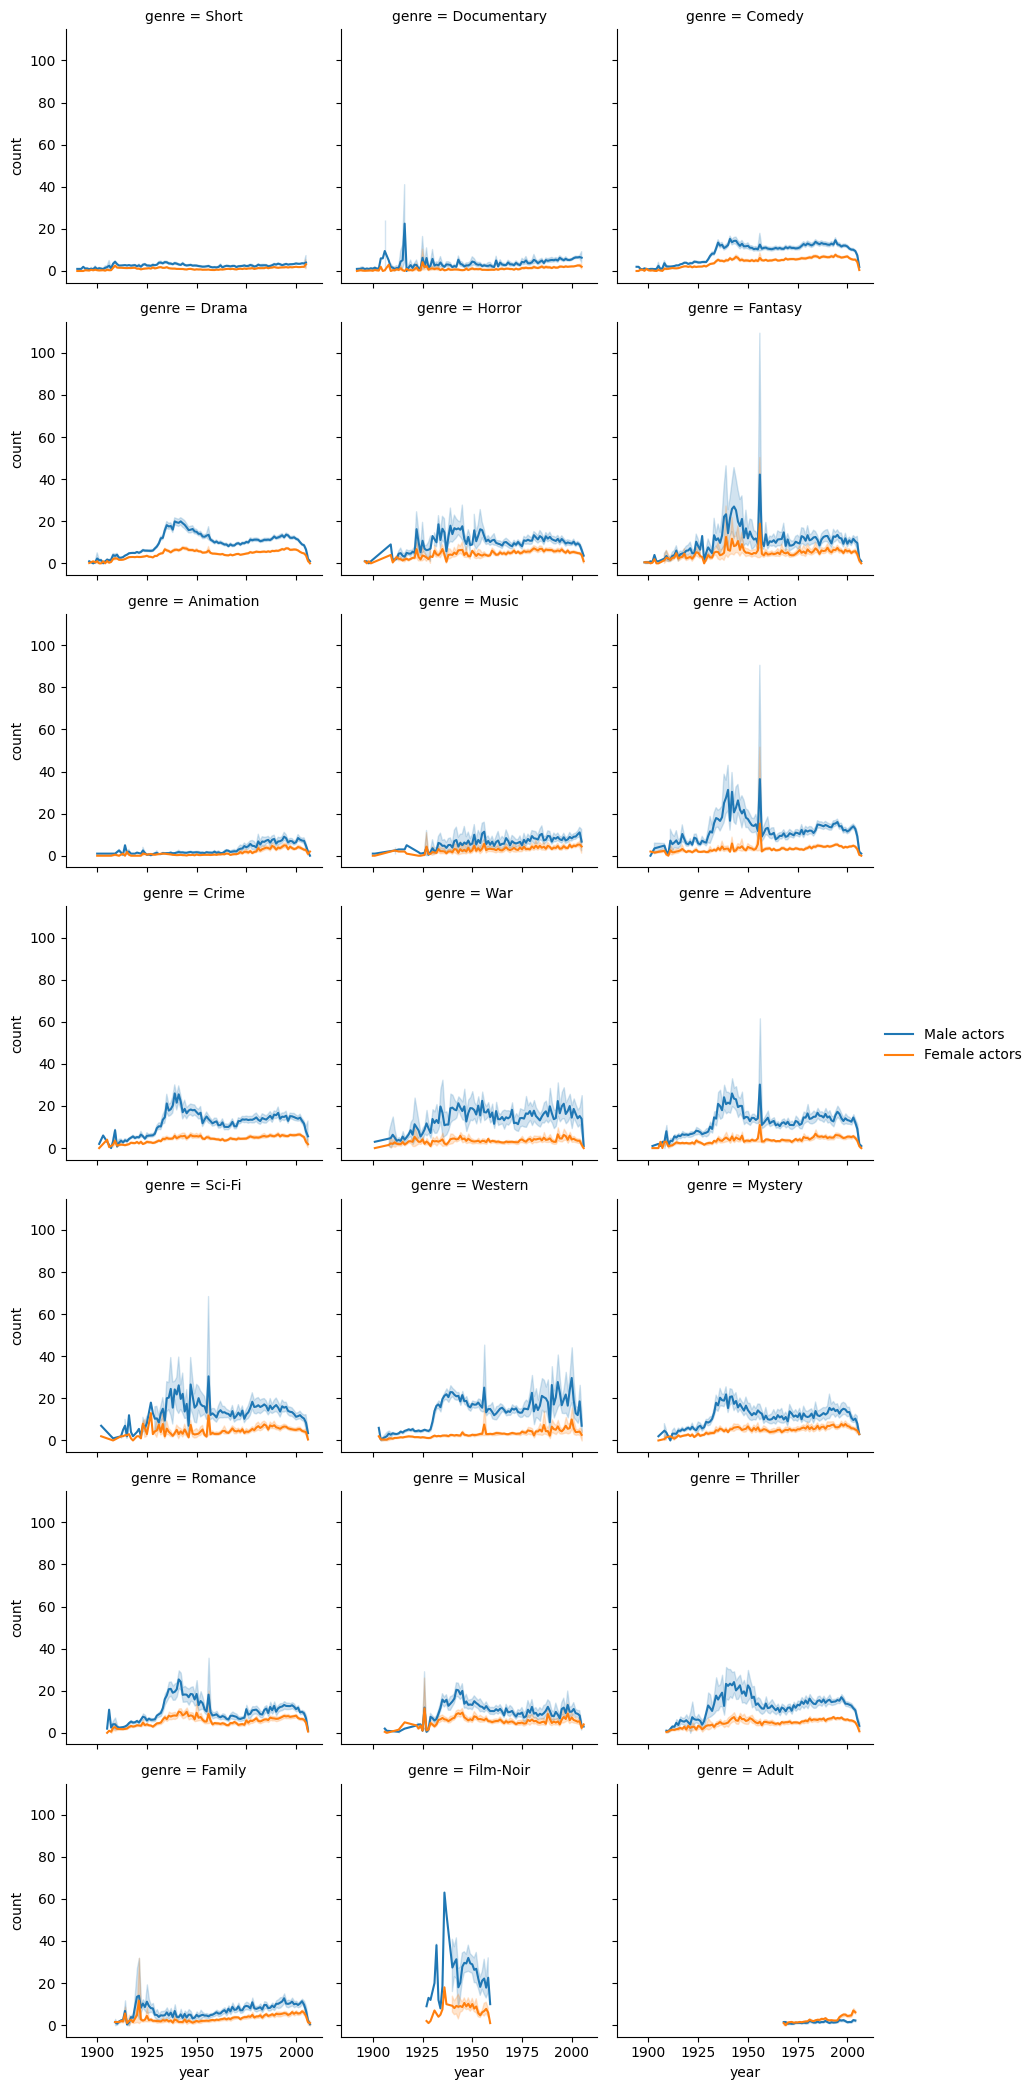

In [28]:
# This creates a FacetGrid containing a line graph per genre which indicates the amount of male and female actors.
# We decided not to use this one in the presentation as it was too big to fit in our story + it was easier to present this data
# in a table than through these graphs. There was no noteworthy difference regarding the timestamp.

query_l3 = """ SELECT genre, COUNT(CASE WHEN actors.gender = 'M' THEN 1 END) AS 'Male actors',
COUNT(CASE WHEN actors.gender = 'F' THEN 1 END) AS 'Female actors', year
FROM movies
JOIN roles
ON roles.movie_id = movies.id
JOIN actors
ON roles.actor_id = actors.id
JOIN movies_genres
ON movies_genres.movie_id = movies.id
GROUP BY year, name, 'Count of actors', genre
"""
df2 = pd.read_sql(query_l3, conn)
df2_melted = pd.melt(df2, id_vars=['year', 'genre'], value_vars=['Male actors', 'Female actors'], var_name='gender', value_name='count')
genregraphs = sns.FacetGrid(df2_melted, col='genre', legend_out='True', col_wrap=3)
genregraphs.map(sns.lineplot, 'year', 'count', 'gender')
genregraphs.add_legend()
                     

From these graphs it is possible to determine whether at certrain points in time, female actors are more visible on screen than male actors in a certain genre. This is for example visible in the adult genre. But for example in 1925 in the category musical, there were more female actors than male actors.

       movie_year  movie_id domination  average_rating
0            1971         2          M             6.4
1            1971         6          M             5.0
2            1939        11          M             6.7
3            1999        15          M             7.5
4            1996        18          M             9.6
...           ...       ...        ...             ...
63605        1989    378558          F             6.9
63606        2001    378583          M             8.7
63607        1981    378596          M             8.2
63608        1999    378610          M             7.0
63609        1998    378614          M             6.3

[63610 rows x 4 columns]


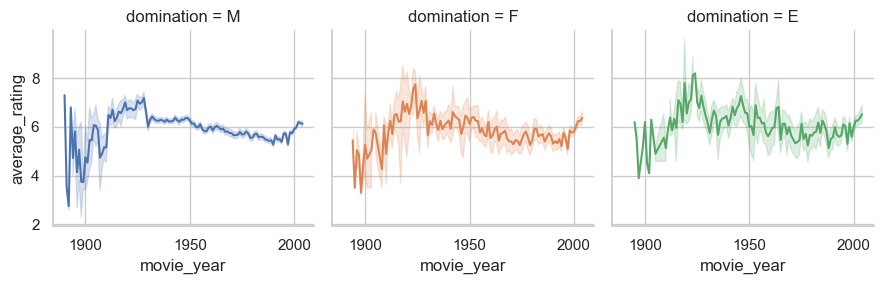

In [74]:
# This subqueried query creates a dataframe containing if a movie has more male, more female or an equal amount of male and female actors.
# Through FacetGrid we created three lineplots indicating the average rating throughout the period of our dataset.

query_l4 = """ 
SELECT movie_year, movie_id, domination, average_rating
FROM (SELECT movies.year AS movie_year, movies.id AS movie_id,
        CASE 
          WHEN SUM(CASE WHEN actors.gender = 'M' THEN 1 ELSE 0 END) > 
               SUM(CASE WHEN actors.gender = 'F' THEN 1 ELSE 0 END) 
          THEN 'M'
          WHEN SUM(CASE WHEN actors.gender = 'M' THEN 1 ELSE 0 END) < 
               SUM(CASE WHEN actors.gender = 'F' THEN 1 ELSE 0 END) 
          THEN 'F'
          ELSE 'E'
        END AS domination,
        AVG(movies.rank) AS average_rating
    FROM movies
    JOIN roles ON roles.movie_id = movies.id
    JOIN actors ON roles.actor_id = actors.id
    GROUP BY movie_id, movie_year
) AS subquery
WHERE average_rating IS NOT NULL
GROUP BY movie_id, movie_year, domination
"""

df3 = pd.read_sql(query_l4, conn)
print(df3)
ratings = sns.FacetGrid(data=df3, col='domination', hue='domination')
ratings.map(sns.lineplot, 'movie_year', 'average_rating')


Through the dominiation we can determine whether or not movies that have more male actors have on average a better rating than movies that have a more female-led cast. Noteworthy is that movies that have equal gender representation score on average better than male dominated movies and female dominated movies.

Text(0.5, 1.0, 'Average number of movies created')

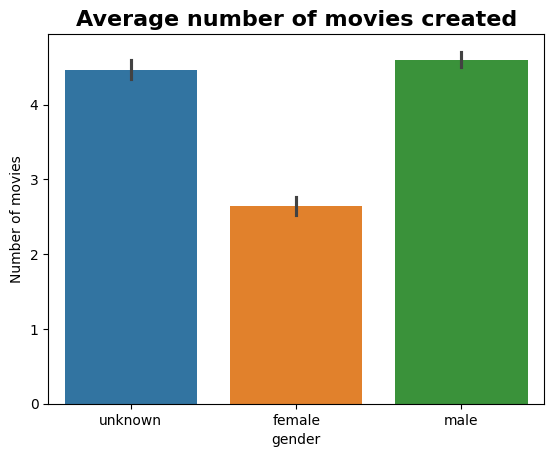

In [70]:
# Our final query created a filmography through the use of a recursive query which counted the amount of movies a director made.
# This was then used to create a dataframe containing the gender of the distinct director with the amount of movies they filmed
# to the indicate the average movie made by a male, female or unknown gender director.

query_l5 = """
WITH RECURSIVE filmography AS (
    SELECT
        directors.id AS director_id,
        directors.first_name,
        directors.last_name,
        movies.id AS movie_id,
        movies.name AS movie_name
    FROM
        directors
        JOIN movies_directors ON directors.id = movies_directors.director_id
        JOIN movies ON movies.id = movies_directors.movie_id

    UNION

    SELECT
        filmography.director_id,
        filmography.first_name,
        filmography.last_name,
        filmography.movie_id,
        filmography.movie_name
    FROM
        filmography
        JOIN movies_directors ON filmography.director_id = movies_directors.director_id
        JOIN movies ON movies_directors.movie_id = movies.id
)
SELECT DISTINCT filmography.director_id, filmography.first_name, filmography.last_name, gender, COUNT(movie_id) as 'Number of movies'
FROM filmography
JOIN directors_genders ON filmography.director_id = directors_genders.director_id
GROUP BY director_id, last_name, first_name, gender;
"""

df4 = pd.read_sql(query_l5, conn)
ax = sns.barplot(df4, x= 'gender', y='Number of movies', hue='gender')
ax.set_title('Average number of movies created', fontsize='16', color='black', fontweight='bold')



By creating the filmography, we can take the average count of movies per gender as all data was available by combining it with the directors_genders table we created. As you can see male and unknown directors get more chances to publish movies than female directors. Of course, this result should be taken with a grain of salt as the unknown genders can influence our results greatly if we were to knew their gender.